In [1]:
import gtfparse
from gtfparse import read_gtf
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import random
from matplotlib import pyplot as plt
import random
import math

In [ ]:
df = read_gtf("trial.gtf")

In [3]:
df.head(20)

,seqname,source,feature,start,end,score,strand,frame,gene_id,transcript_id
0,chr1,hg19_wgEncodeGencodeBasicV19,exon,66999066,66999090,0.0,+,0,ENST00000237247.6,ENST00000237247.6
1,chr1,hg19_wgEncodeGencodeBasicV19,start_codon,67000042,67000044,0.0,+,0,ENST00000237247.6,ENST00000237247.6
2,chr1,hg19_wgEncodeGencodeBasicV19,CDS,67000042,67000051,0.0,+,0,ENST00000237247.6,ENST00000237247.6
3,chr1,hg19_wgEncodeGencodeBasicV19,exon,66999929,67000051,0.0,+,0,ENST00000237247.6,ENST00000237247.6
4,chr1,hg19_wgEncodeGencodeBasicV19,CDS,67091530,67091593,0.0,+,2,ENST00000237247.6,ENST00000237247.6
5,chr1,hg19_wgEncodeGencodeBasicV19,exon,67091530,67091593,0.0,+,0,ENST00000237247.6,ENST00000237247.6
6,chr1,hg19_wgEncodeGencodeBasicV19,CDS,67098753,67098777,0.0,+,1,ENST00000237247.6,ENST00000237247.6
7,chr1,hg19_wgEncodeGencodeBasicV19,exon,67098753,67098777,0.0,+,0,ENST00000237247.6,ENST00000237247.6
8,chr1,hg19_wgEncodeGencodeBasicV19,CDS,67099763,67099846,0.0,+,0,ENST00000237247.6,ENST00000237247.6
9,chr1,hg19_wgEncodeGencodeBasicV19,exon,67099763,67099846,0.0,+,0,ENST00000237247.6,ENST00000237247.6


In [3]:
exons = df[df["feature"] == "exon"]
strand_col = exons["strand"]

In [4]:
num_exons = exons.shape[0]

In [5]:
#Defining the donor and acceptor sites for the training and validation sets of data

exon_end = exons["end"]
exon_beginning = exons["start"]

acceptor_splice_sites = exon_end + 1
donor_splice_sites = exon_beginning - 1

In [ ]:
chrom_number = exons.iloc[:, 0]
chrom_number

In [8]:
#Generate start and end positions for training/testing set intervals

num_flanking_nucleotides = 1000

start_position = []
end_position = []

for a, b in zip(acceptor_splice_sites, donor_splice_sites):
    start_position.append(a-1000)
    end_position.append(a+1000)
    start_position.append(b-1000)
    end_position.append(b+1000)

In [ ]:
#Display Intervals

for i in range(len(exons)):
    print (str(start_position[i]) + "," + str(end_position[i]))

In [64]:
intervals = pd.DataFrame(zip(start_position, end_position))
intervals

,0,1
0,66998091,67000091
1,66998065,67000065
2,66999052,67001052
3,66998928,67000928
4,67090594,67092594
5,67090529,67092529
6,67097778,67099778
7,67097752,67099752
8,67098847,67100847
9,67098762,67100762


In [ ]:
interval_frame = pd.concat([intervals, chrom_number], axis=1, ignore_index=True)
interval_frame = interval_frame.drop(interval_frame.columns[2], axis="columns")
interval_frame

In [12]:
#Duplicate chromosome number strings to account for odd-numbered indices

b=[]
for i in list(chrom_number):
    b.extend([i, i])

c=[]
for i in list(strand_col):
    c.extend([i, i])

d=pd.DataFrame(c)


In [14]:
extended_chrom_number = pd.DataFrame(b)
extranded_strand = pd.DataFrame(c)
interval_frame = pd.concat([interval_frame, extended_strand], axis=1, ignore_index=True)

In [15]:
final = pd.concat([interval_frame, extended_chrom_number], axis=1, ignore_index=True)
interval_dataframe = pd.concat([final, d], axis=1, ignore_index=True)
interval_dataframe


,0,1,2,3
0,66998091,67000091,chr1,+
1,66998065,67000065,chr1,+
2,66999052,67001052,chr1,+
3,66998928,67000928,chr1,+
4,67090594,67092594,chr1,+
5,67090529,67092529,chr1,+
6,67097778,67099778,chr1,+
7,67097752,67099752,chr1,+
8,67098847,67100847,chr1,+
9,67098762,67100762,chr1,+


In [16]:
interval_dataframe.columns
interval-dataframe = interval_dataframe.rename(columns={0: "START", 1 : "END", 2 : "CHROM", 3: "STRAND"})

In [ ]:
interval_dataframe["column4"]=""
interval_dataframe["column5"]=""
interval_dataframe

In [62]:
#Saving text file of intervals to upload to galaxy

fmt = ('%5u', '%5u', '%5s', '%5s', '%5s', '%5s')

np.savetxt(r'bed_file.txt', interval_dataframe , fmt=fmt, delimiter = '\t')

In [ ]:
#Function to create a list of intervals for the shifted dataset

shifted_intervals = []

for ind in ab.index: 
    for i in [-1, 1]:
        shifted_intervals.append((interval_frame['START'][ind]+i, interval_frame['END'][ind]+i, ab['CHROM'][ind], ab['STRAND'][ind]))

In [2]:
#Define function to read fasta files

def read_fasta(fp):
    name, seq = None, []
    for line in fp:
        line = line.rstrip()
        if line.startswith(">"):
            if name: yield (name, ''.join(seq))
            name, seq = line, []
        else:
            seq.append(line)
    if name: yield (name, ''.join(seq))


In [11]:
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, RMSprop

In [22]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, 
                 input_shape=(2000, 4)))
model.add(Conv1D(filters=64, kernel_size=12))
model.add(Conv1D(filters=128, kernel_size=12))
model.add(Conv1D(filters=256, kernel_size=12))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))
opt = RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['binary_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 1989, 32)          1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1978, 64)          24640     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1967, 128)         98432     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1956, 256)         393472    
_________________________________________________________________
flatten_1 (Flatten)          (None, 500736)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               128188672 
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

In [ ]:
model.save_weights("/Users/mukundhmurthy/Desktop/original_weights.h5")

In [32]:
model.load_weights("/Users/mukundhmurthy/Desktop/original_weights.h5")

In [34]:
history = model.fit(np.stack(features), np.stack(labels), batch_size = 64, epochs=30, verbose=1, validation_split=0.25, callbacks = [es, mc])

Train on 75000 samples, validate on 25000 samples
Epoch 1/30
75000/75000 [==============================] - 8317s 111ms/sample - loss: 0.4976 - binary_accuracy: 0.7822 - val_loss: 0.4318 - val_binary_accuracy: 0.8120
Epoch 2/30
75000/75000 [==============================] - 8453s 113ms/sample - loss: 0.3163 - binary_accuracy: 0.8734 - val_loss: 0.4004 - val_binary_accuracy: 0.8342
Epoch 3/30
75000/75000 [==============================] - 6749s 90ms/sample - loss: 0.1240 - binary_accuracy: 0.9548 - val_loss: 0.5167 - val_binary_accuracy: 0.8339
Epoch 4/30
75000/75000 [==============================] - 6750s 90ms/sample - loss: 0.0515 - binary_accuracy: 0.9842 - val_loss: 0.7590 - val_binary_accuracy: 0.8417
Epoch 5/30
75000/75000 [==============================] - 6757s 90ms/sample - loss: 0.0365 - binary_accuracy: 0.9902 - val_loss: 0.7366 - val_binary_accuracy: 0.8472
Epoch 6/30
75000/75000 [==============================] - 6848s 91ms/sample - loss: 0.0302 - binary_accuracy: 0.9928 -

In [5]:
#Listing Callbacks

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
mc = ModelCheckpoint('/Users/mukundhmurthy/Desktop/final_model.h5', monitor='val_loss', mode='min', save_best_only=True)

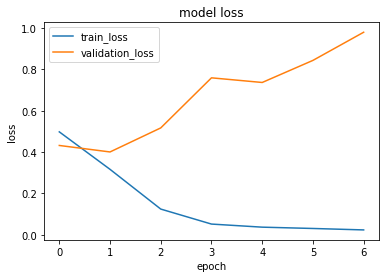

In [193]:
#Plotting Training and Validation losses

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'])
plt.show()

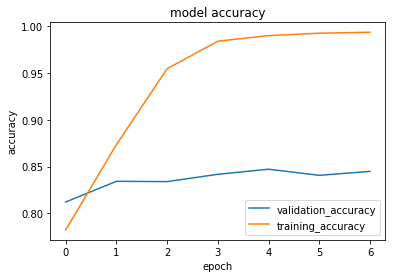

In [195]:
plt.figure()
plt.plot(history.history['val_binary_accuracy'])
plt.plot(history.history['binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation_accuracy', 'training_accuracy'])
plt.show()



In [ ]:
print(history.history['val_loss'])
print(history.history['loss'])
print(history.history['binary_accuracy'])
print(history.history['val_binary_accuracy'])

In [30]:
#Run Predictions for Test Dataset
_, acc = model.evaluate(np.stack(features), np.stack(labels), verbose=1)

20000/20000 [==============================] - 447s 22ms/sample - loss: 1.3511 - binary_accuracy: 0.7315


In [59]:
#Upload fasta files created from genomic interval sequence extraction in Galaxy

train_seq = []

with open('train.fasta') as fp:
    for name, seq in read_fasta(fp):
        train_seq.append(seq)

shifted_seq = []

with open('random.fasta') as fp:
    for name, seq in read_fasta(fp):
        shifted_seq.append(seq)

In [37]:
##Defining a function that creates the input, the positive and negative sites along with a factor that determines how balanced the dataset is.##


def create_input_list(randm, trai, num_times_larger): 
    selected_from_train = []
    train= map(str.upper, trai)
    for i in range(len(randm)*num_times_larger):
        selected_from_train.append(train[random.randint(0, len(train)-1)])
    zeros = (np.zeros(len(randm))).reshape(-1, 1)
    ones = np.ones(len(randm)*num_times_larger).reshape(-1, 1)
    labels_list = np.vstack((zeros, ones))
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    one_hot_encoder = OneHotEncoder()
    integer_encoder = LabelEncoder()

    input_features = []
    
    for sequence in (selected_from_train + randm):
        integer_encoded = integer_encoder.fit_transform(list(sequence))
        one_hot_encoded = one_hot_encoder.fit_transform(np.array(integer_encoded).reshape(-1,1))
        input_features.append(one_hot_encoded.toarray())
        
    input_features = np.stack(input_features)
    
    labels = np.array(labels_list)
    input_labels = one_hot_encoder.fit_transform(labels).toarray()
    
    good_list = zip(input_features, input_labels)
    
    random.shuffle(good_list)
    
    input_features, input_labels = zip(*good_list)
    
    
    return (input_features, input_labels)
        

In [63]:
train_seq, shifted_seq = cleanse_datasets(train_seq, shifted_seq) 

In [62]:
#Function that cleanses the fasta sequences

def cleanse_datasets(train_sequence, shifted_sequence):
    
    shifted_sequence = map(str.upper, shifted_sequence)
    train_sequence = map(str.upper, train_sequence)
    
    train_sequence = list(dict.fromkeys(train_sequence))
    shifted_sequence = list(dict.fromkeys(shifted_sequence))

    for seq in train_sequence: 
        while len(set(seq))!=4:
            try: 
                train_sequence.remove(seq)
            except: 
                break
    for seq in shifted_sequence: 
        while len(set(seq))!=4:
            try: 
                shifted_sequence.remove(seq)
            except: 
                break
    return train_sequence, shifted_sequence
    

In [108]:
from pyfasta import Fasta

In [64]:
from random import sample

In [94]:
sampled_train = sample(train_seq, 15)
sampled_shifted = sample(shifted_seq, 15)

In [100]:
    sampled_train_features = []
    sampled_shifted_features = []
    
    i = 0
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    one_hot_encoder = OneHotEncoder()
    integer_encoder = LabelEncoder()
    for sequence in (sampled_train+sampled_shifted):
        integer_encoded = integer_encoder.fit_transform(list(sequence))
        one_hot_encoded = one_hot_encoder.fit_transform(np.array(integer_encoded).reshape(-1,1))
        if i<15:
            sampled_train_features.append(one_hot_encoded.toarray())
        else:
            sampled_shifted_features.append(one_hot_encoded.toarray())
        i+=1
    sampled_train_features = np.stack(sampled_train_features)
    sampled_shifted_features = np.stack(sampled_shifted_features)

In [168]:
import tensorflow.keras.backend as K

def compute_salient_bases(model, x):
    input_tensors = [model.input]
    gradients = model.optimizer.get_gradients(model.output[0][1], model.input)
    compute_gradients = K.function(inputs = input_tensors, outputs = gradients)
    x_value = np.expand_dims(x, axis=0)
    gradients = compute_gradients([x_value])[0][0]
    print (gradients)
    sal = np.clip(np.sum(np.multiply(gradients,x), axis=1),a_min=0, a_max=None)
    return sal

[[-3.1847455e-11 -1.3772572e-10  5.1179944e-10  6.6217157e-11]
 [ 2.6244090e-10 -8.4550600e-10 -1.7908091e-09  6.7880929e-10]
 [ 5.6311573e-09  3.2034302e-09  6.7143369e-10  4.8025689e-10]
 ...
 [ 3.2019190e-09  2.0514618e-11  4.2242987e-09 -9.3625152e-09]
 [-3.0498897e-09 -2.9968217e-10  1.6634005e-09 -9.7121322e-10]
 [ 4.7359239e-10 -1.1890828e-09 -4.0731141e-10  4.8373083e-10]]
[[ 3.4352590e-05 -1.0255091e-05 -7.2833600e-06  5.2880114e-05]
 [ 2.1465206e-05 -8.0738646e-05 -7.0746799e-05 -1.8582901e-05]
 [ 6.2001825e-05 -4.2839067e-05  6.3757696e-05  5.4124430e-05]
 ...
 [-6.1933468e-05  1.2354649e-05  5.6623201e-05  6.6970351e-05]
 [ 4.3633230e-05  7.8495495e-06  2.1958309e-05  7.9274760e-06]
 [ 2.3680779e-05 -3.3713972e-05 -2.2695160e-05  1.7646491e-05]]
[[ 2.54512089e-14  5.68089107e-14 -5.65241755e-14  2.70614084e-14]
 [-7.59275591e-15 -1.42072809e-13 -1.03131980e-13  8.02049196e-14]
 [ 4.51997841e-13 -6.41344752e-14  2.15269412e-13  2.19601084e-13]
 ...
 [ 3.36816024e-13  1.55908

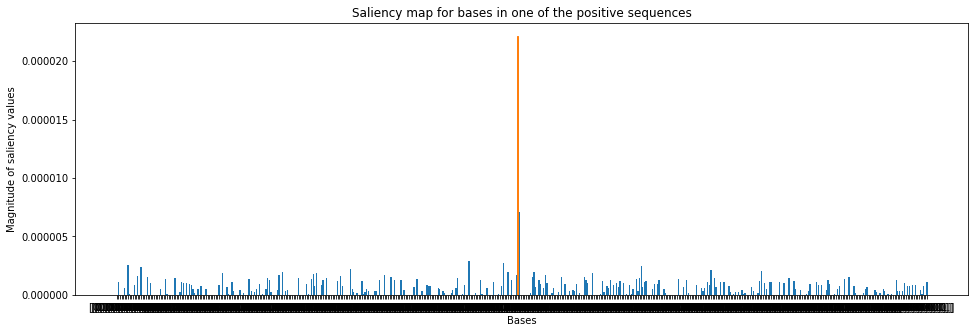

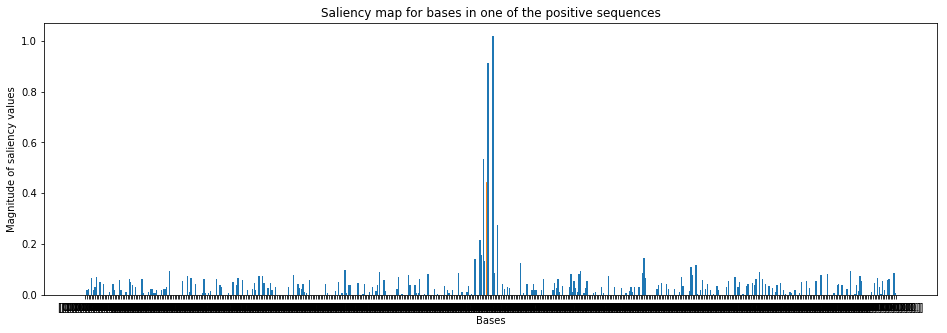

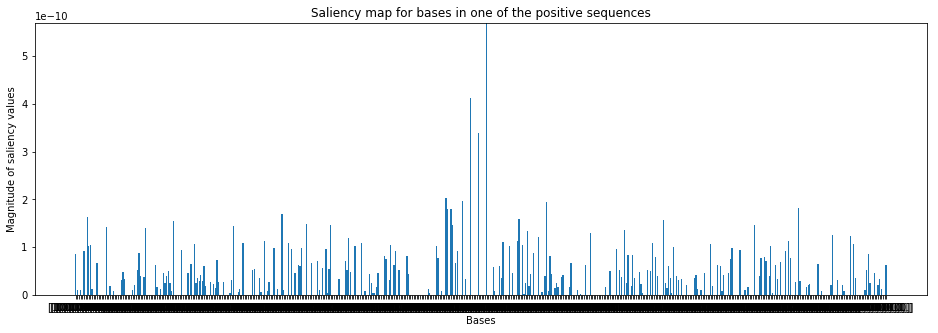

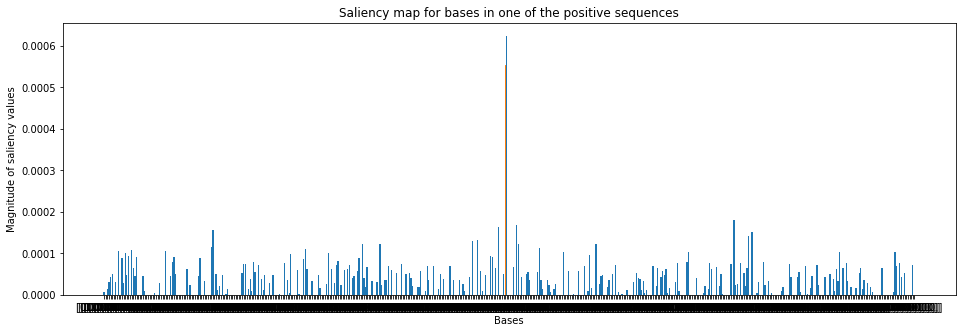

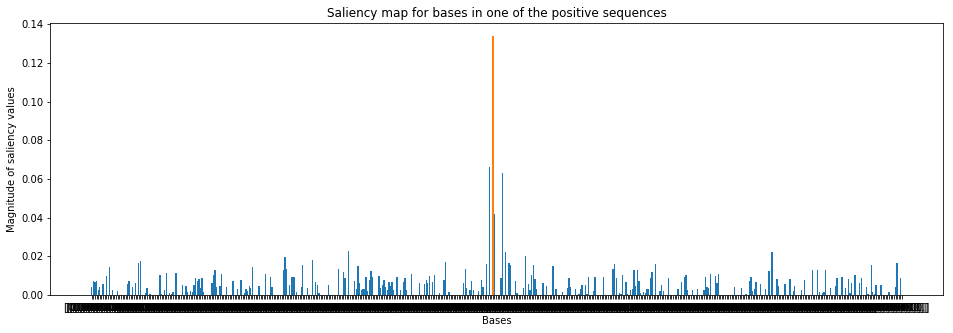

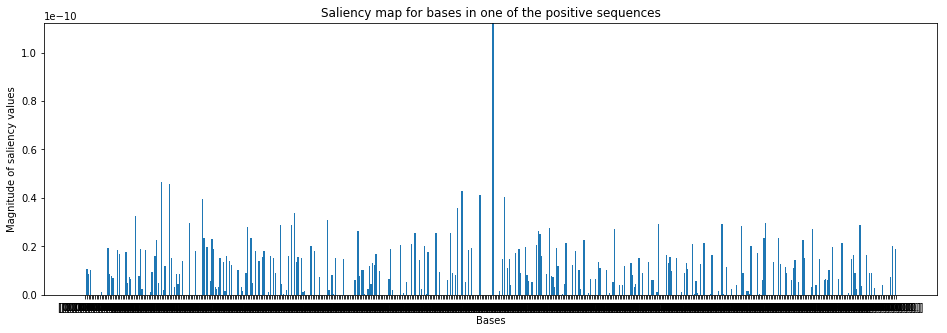

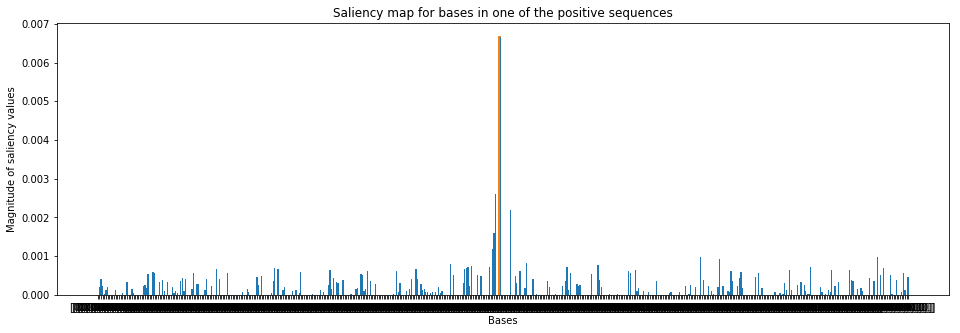

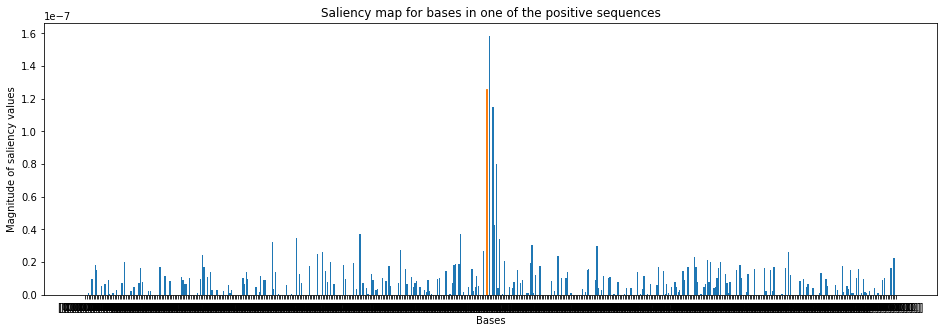

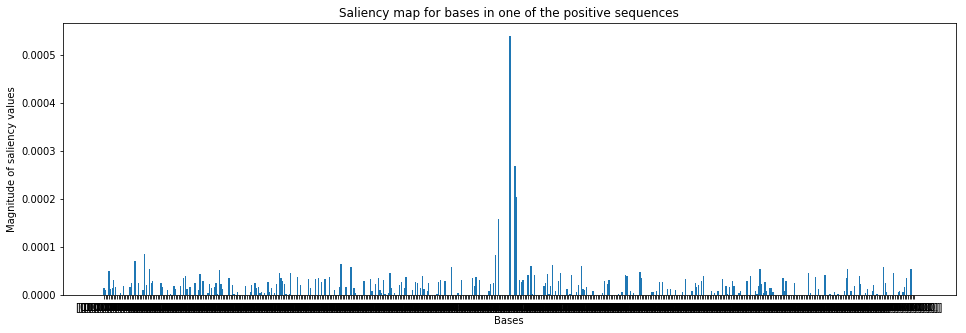

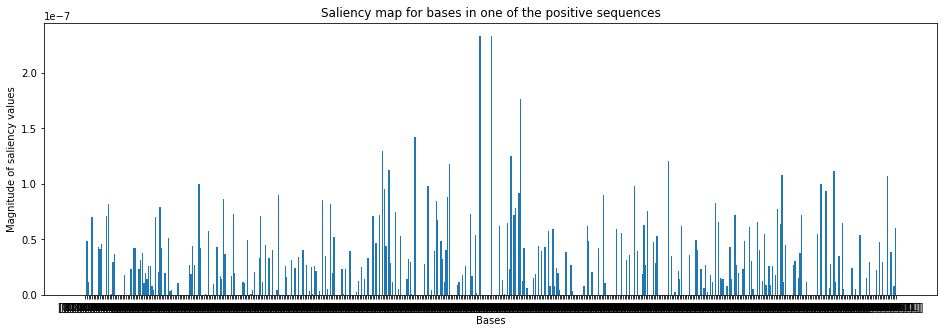

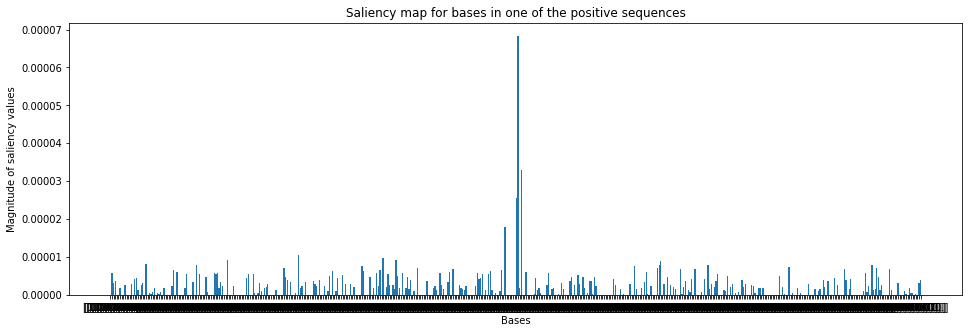

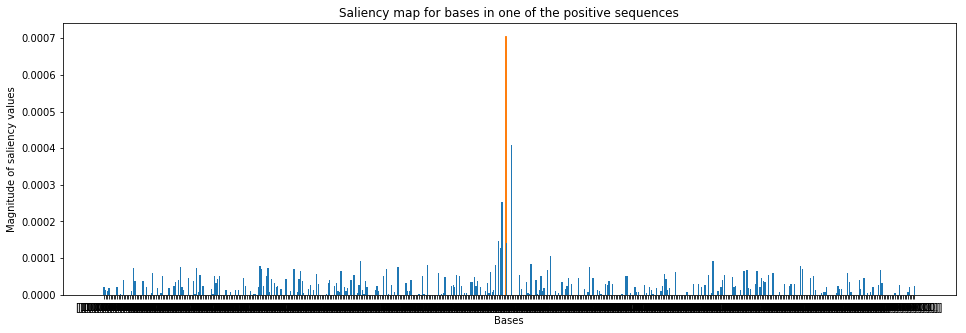

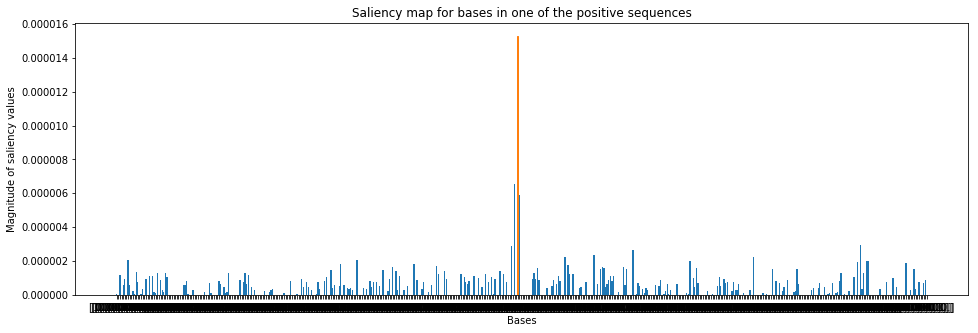

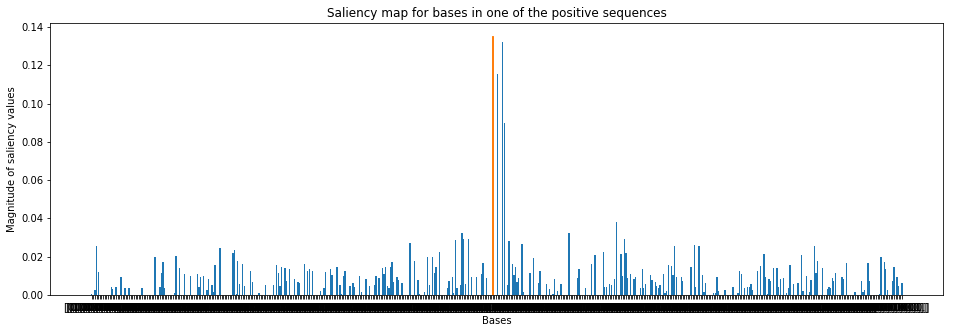

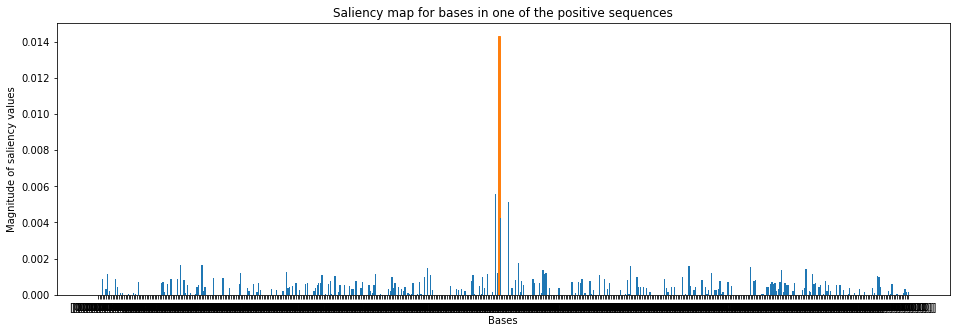

In [187]:
 # Visualizing saliency gradients for 15 randomly selected examples from training set

for k, sequence in enumerate(sampled_train_features):
    
    sal = compute_salient_bases(model, sampled_train_features[k])

    start_index = 750

    ending_index = 1250

    color_start = 247

    color_end = 248

    plt.figure(figsize=[16,5])
    barlist = plt.bar(np.arange(500), sal[start_index:ending_index])
    [barlist[i].set_color('C1') for i in range(color_start, color_end)]  # Change the coloring here if you change the sequence index.
    plt.xlabel('Bases')
    plt.ylabel('Magnitude of saliency values')
    plt.xticks(np.arange(500), list(sampled_train_features[k][start_index:ending_index] ));
    plt.title('Saliency map for bases in one of the positive sequences');

In [191]:
#saliency base indices for most important nucleotides

important_nucleotide

[997,
 1001,
 1003,
 998,
 997,
 1001,
 997,
 999,
 1000,
 1000,
 1001,
 997,
 997,
 997,
 997]